Q1. What applicant characteristics differ most between approved and rejected loans?

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("synthetic_loan_data.csv")  # Update path if needed

# Split into approved and rejected loans
approved = df[df['Loan_Status'] == 'Y']
rejected = df[df['Loan_Status'] == 'N']

# Select numeric features
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Calculate group-wise means and differences
summary_stats = pd.DataFrame({
    'Approved_Mean': approved[numeric_features].mean(),
    'Rejected_Mean': rejected[numeric_features].mean(),
    'Difference': approved[numeric_features].mean() - rejected[numeric_features].mean()
})

# Encode Loan_Status for correlation
df['Loan_Status_Binary'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Correlation with loan approval
correlations = df[numeric_features + ['Loan_Status_Binary']].corr()['Loan_Status_Binary'].drop('Loan_Status_Binary')
summary_stats['Correlation_with_Approval'] = correlations

# Sort by correlation
summary_stats = summary_stats.sort_values(by='Correlation_with_Approval', ascending=False)

# Show result
print(summary_stats)


                   Approved_Mean  Rejected_Mean   Difference  \
Credit_History          1.000000       0.229323     0.770677   
ApplicantIncome      5150.194823    4096.496241  1053.698582   
CoapplicantIncome    1577.046322    1515.977444    61.068878   
Loan_Amount_Term      327.465940     331.353383    -3.887443   
LoanAmount            141.017711     169.462406   -28.444695   

                   Correlation_with_Approval  
Credit_History                      0.843530  
ApplicantIncome                     0.186439  
CoapplicantIncome                   0.020703  
Loan_Amount_Term                   -0.024924  
LoanAmount                         -0.250863  


C:\Users\Shrusty Raj\AppData\Local\Temp\ipykernel_13772\2476036979.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


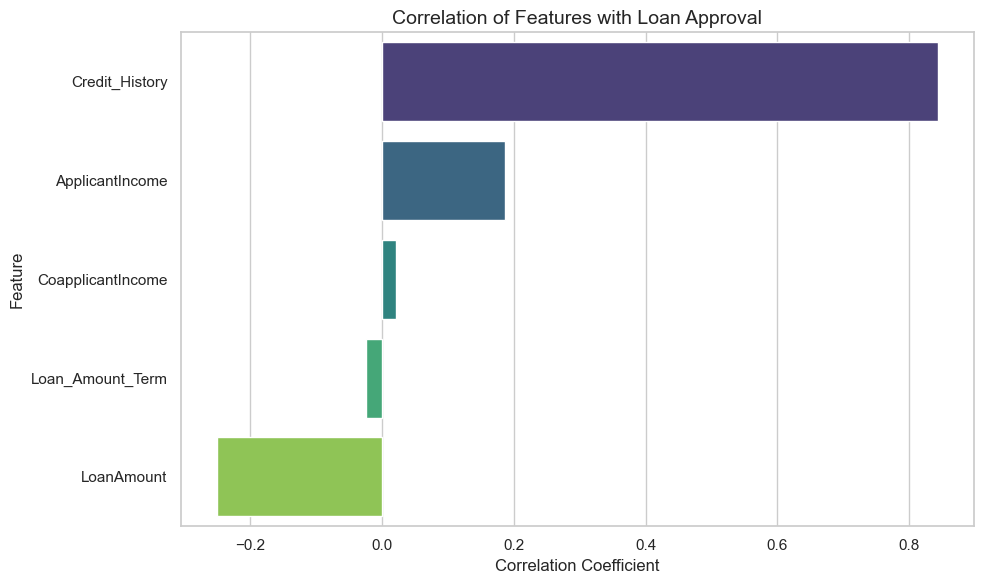

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Load your previously calculated summary_stats DataFrame here

# Set style
sns.set(style="whitegrid")

# Plot correlation with Loan_Status
plt.figure(figsize=(10, 6))
sns.barplot(
    y=summary_stats.index,
    x=summary_stats["Correlation_with_Approval"],
    palette="viridis"
)
plt.title("Correlation of Features with Loan Approval", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
